This code does the following:

Mounts the Google Drive to access the dataset.
Loads the dataset.
Fills any missing values.
Normalizes the features and the target variable.
Prepares the sequence data for LSTM input.
Splits the data into training and testing sets.
Builds an LSTM model and trains it.
Evaluates the model using MAE and RMSE.
Plots the training and validation loss.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
42/42 [==============================] - 4s 26ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 2/50
42/42 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 5/50
42/42 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 7/50
42/42 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 8/50
42/42 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 9/50
42/42 [==============================] - 0s 5ms/step - loss: 0.0059 - val_l

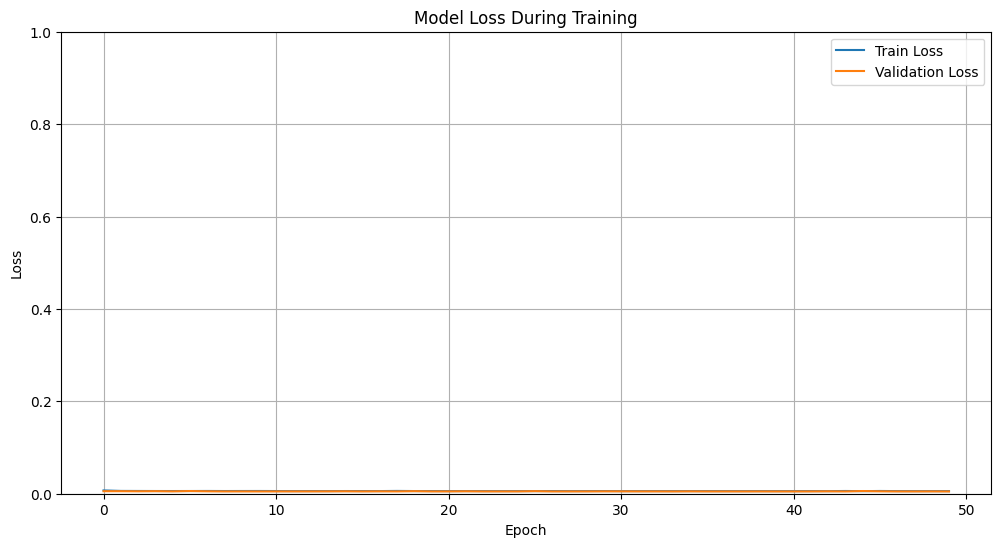

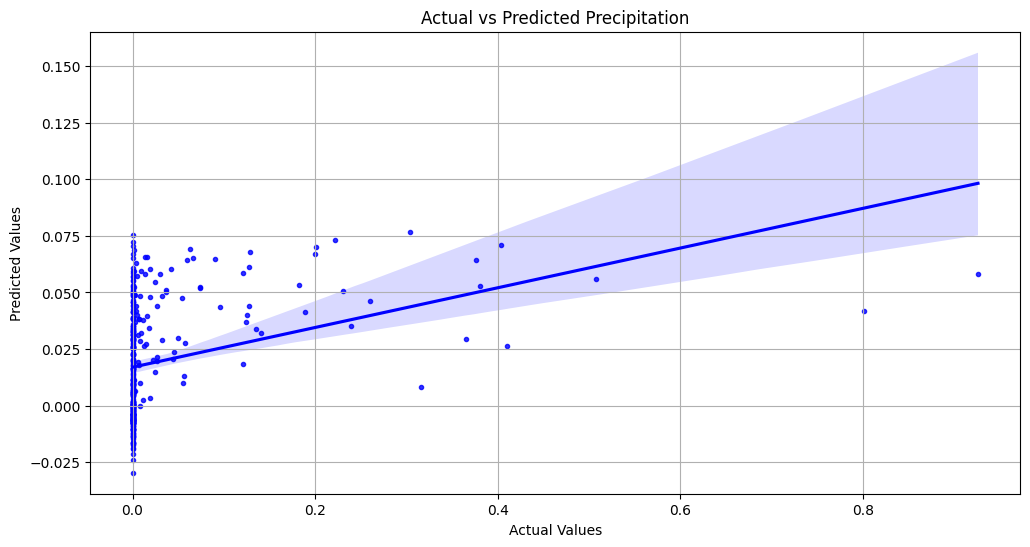

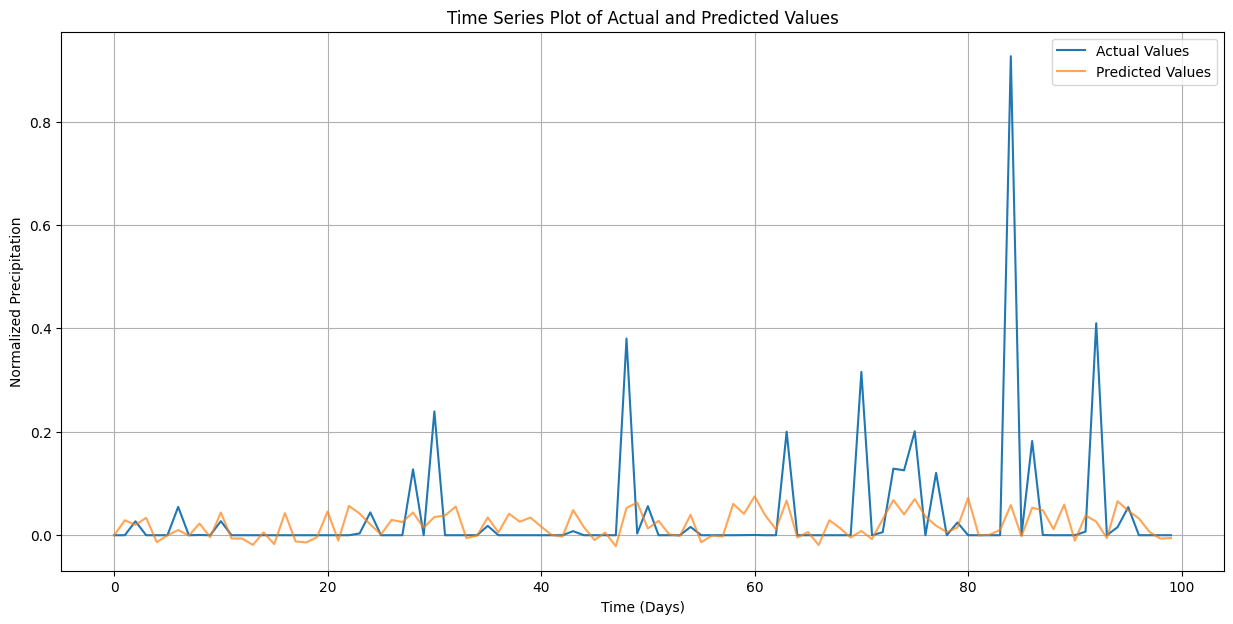

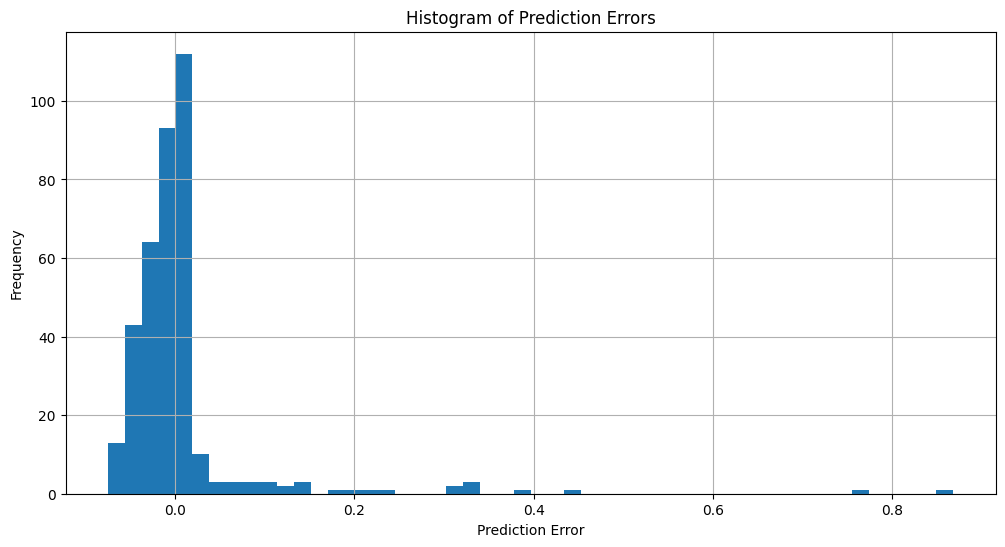

The 'Model Loss During Training' plot shows the model's loss on the training and validation set over each epoch. Lower values indicate better performance.
The 'Scatter Plot' with a regression line indicates the correlation between actual and predicted values.
The 'Time Series Plot' shows the actual and predicted precipitation values over a specific time period.
The 'Histogram of Prediction Errors' plot shows the distribution of the model's prediction errors. A narrower, symmetric distribution centered around zero indicates good model performance.


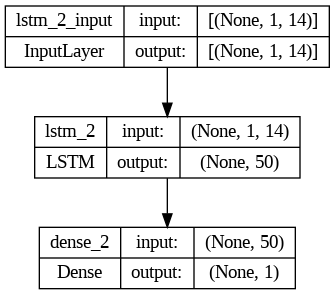

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns  # For improved visualization

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define the path to the folder and the filename
folder_path = '/content/drive/My Drive/yousef/SCS-CN-GIS/'
file_name = 'POWER_Point_Daily_20190101_20231231_032d5707N_035d7664E_LST-Comma-dataonly.csv'
file_path = f'{folder_path}/{file_name}'

# Load the dataset
data = pd.read_csv(file_path)

# Preprocess the data
# Fill any missing values
data.fillna(method='ffill', inplace=True)

# Define target variable and features
target_variable = 'PRECTOTCORR'
features = list(data.columns.difference([target_variable]))

# Normalizing the data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data[target_variable] = scaler.fit_transform(data[[target_variable]])

# Creating sequences for LSTM
time_steps = 1
X = data[features].values
y = data[target_variable].values
X = np.array([X[i - time_steps: i] for i in range(time_steps, len(X))])
y = y[time_steps:]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM Model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model with the training set and validating with a portion of it
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=1)

# Model evaluation using MAE and RMSE metrics
mae_metric = MeanAbsoluteError()
rmse_metric = RootMeanSquaredError()

y_pred = model.predict(X_test)
mae_metric.update_state(y_test, y_pred)
rmse_metric.update_state(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae_metric.result().numpy()}')
print(f'Root Mean Squared Error on Test Set: {rmse_metric.result().numpy()}')

# Plotting training history for loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)  # Set the limit for the y-axis
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of actual vs. predicted precipitation values with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=y_pred.flatten(), color='blue', marker='.')
plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Time series plot of actual and predicted values for a subset of the test data
plt.figure(figsize=(15, 7))
time_series_length = 100  # Change this based on how many days you want to visualize
plt.plot(y_test[:time_series_length], label='Actual Values')
plt.plot(y_pred[:time_series_length], label='Predicted Values', alpha=0.7)
plt.title('Time Series Plot of Actual and Predicted Values')
plt.xlabel('Time (Days)')
plt.ylabel('Normalized Precipitation')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of prediction errors
errors = y_test - y_pred.flatten()
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=50)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Explain the output
print("The 'Model Loss During Training' plot shows the model's loss on the training and validation set over each epoch. Lower values indicate better performance.")
print("The 'Scatter Plot' with a regression line indicates the correlation between actual and predicted values.")
print("The 'Time Series Plot' shows the actual and predicted precipitation values over a specific time period.")
print("The 'Histogram of Prediction Errors' plot shows the distribution of the model's prediction errors. A narrower, symmetric distribution centered around zero indicates good model performance.")



from tensorflow.keras.utils import plot_model
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


